In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

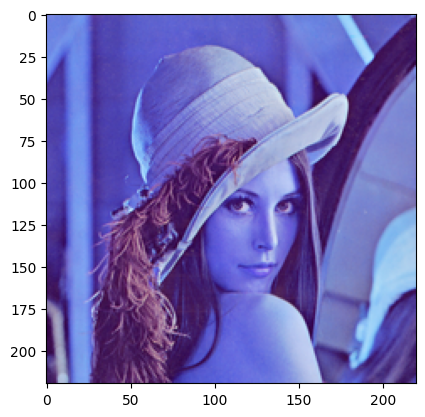

In [6]:
img = cv2.imread("Lenna_(test_image).png", cv2.IMREAD_COLOR)
plt.imshow(img)


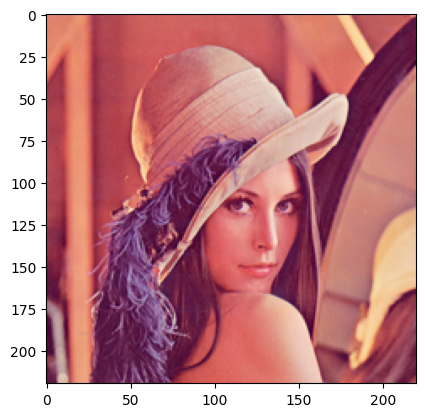

In [7]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

2100


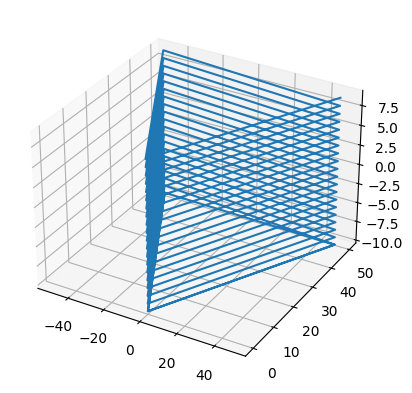

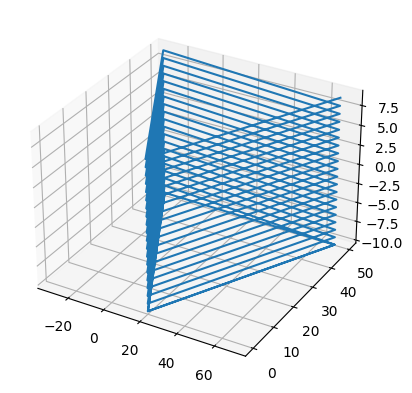

In [73]:
xset = []
yset = []
for x in range(-50,50,1):
    #print(i)
    xset.append([x])
    if x>0:
        y = x
        yset.append([y])
    else:
        y = -x
        yset.append([y])

#print(z[:,None]) #important
total = np.array([])
for i in range(-10,10,1):
    z = i*np.ones(100)
    z = z[:,None]
    buffer2 = np.hstack((xset,yset))
    buffer2 = np.hstack((buffer2,z))
    if i == -10:
        total = buffer2
    total = np.vstack((total,buffer2))

xset = np.array(xset)
yset = np.array(yset)
print(len(total))
xsetnew = []
ysetnew = []
zsetnew = []
for i in range(len(total)):
    xsetnew.append(total[i][0])
    ysetnew.append(total[i][1])
    zsetnew.append(total[i][2])
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xsetnew, ysetnew, zsetnew)
plt.show()

#translation x-20
#total for matrix 
qq = np.ones(len(total))[:,None]

total = np.hstack((total,qq))
original = total
translation_matrix = np.array([[1,0,0,20],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

total = translation_matrix@total.T

xsetnew = []
ysetnew = []
zsetnew = []

for i in range(len(total.T)):
    xsetnew.append(total.T[i][0])
    ysetnew.append(total.T[i][1])
    zsetnew.append(total.T[i][2])
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xsetnew, ysetnew, zsetnew)
plt.show()



[[-50.  50. -10.   1.]
 [-49.  49. -10.   1.]
 [-48.  48. -10.   1.]
 ...
 [ 47.  47.   9.   1.]
 [ 48.  48.   9.   1.]
 [ 49.  49.   9.   1.]]
[[-50. -49. -48. ...  47.  48.  49.]
 [ 50.  49.  48. ...  47.  48.  49.]
 [-10. -10. -10. ...   9.   9.   9.]
 [  1.   1.   1. ...   1.   1.   1.]]
[[ 1  0  0 20]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]
[[-30. -29. -28. ...  67.  68.  69.]
 [ 50.  49.  48. ...  47.  48.  49.]
 [-10. -10. -10. ...   9.   9.   9.]
 [  1.   1.   1. ...   1.   1.   1.]]


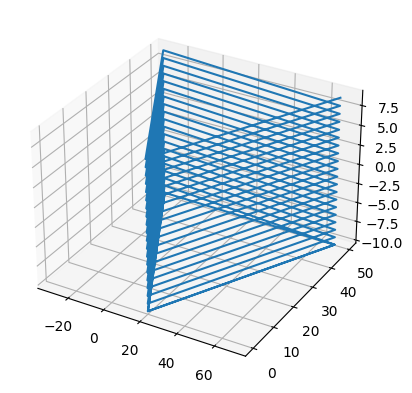

In [71]:
#translation
#total for matrix 
qq = np.ones(len(total))[:,None]

total = np.hstack((total,qq))
print(total)
print(total.T)
translation_matrix = np.array([[1,0,0,20],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print(translation_matrix)
total = translation_matrix@total.T
print(total)
xsetnew = []
ysetnew = []
zsetnew = []

for i in range(len(total.T)):
    xsetnew.append(total.T[i][0])
    ysetnew.append(total.T[i][1])
    zsetnew.append(total.T[i][2])
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xsetnew, ysetnew, zsetnew)
plt.show()

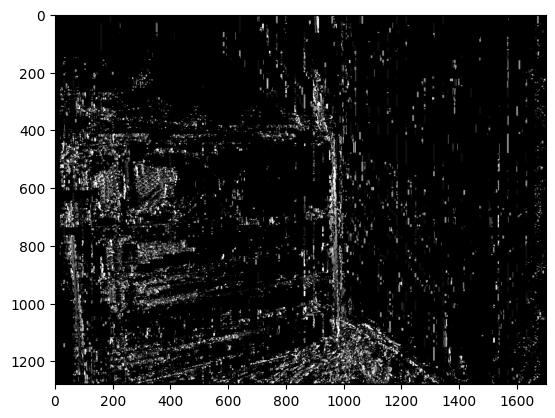

In [3]:
#depth stereo
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imgL = cv.imread('left.jpg', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('right.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(imgL)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=5)#
#numDisparities	the disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity.
#blockSize	the linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence.
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()